$\#\#\#\#\#\#\#$ Llibreries $\#\#\#\#\#\#\#$

In [256]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from ip2geotools.databases.noncommercial import DbIpCity
import json
from urllib.request import urlopen 
import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

# Nivell 1

### L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

### Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

### ABSTRACT

 In this exercise we are asked to extract the data we want to analyse from the dataset "Web_access_log-akemenius.com". The data we have extract from the dataset has been only the IPs, dates (day and time), and Urls that had been acceded, since our goal was to answer the questions: Which are the countries that spend more time in this webpage, and how many content each country browses when on the site. The analysis has shown that Canada has spend more time in this webpage, while US has seen more content.

## Exercici 1: Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources". 

The file "Web_access_log-akumenius.com.txt" is a file log of searches of users (IPs) from 23 February to 2 March that search for hotel rooms in different countries/cities. 

> localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] "OPTIONS * HTTP/1.0" 200 - "-" "Apache (internal dummy connection)" VLOG=-

A log entry with an external sucseful connection, looks as:

> www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:10:31 +0100] "GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-


The data from this dataset are logs from the webpage akumenius.com, which is a webpage for booking hotel rooms. We can see that the data format is:

> localhost IP (two dashes) date webpage (two dashes) webengine (a constant as end to the entry: VLOG=-)

> webpage IP (two dashes) date (in day time format GMT) Webpage (destiny/hotelroom) webpageCode (two dashes)  Navigator Searchbot/Crawler (ending entry: VLOG=-)

In here they ask to standarize the data, meaning, that we need to make the entries consistent for pre-analysis, cleaning, etc. and the analysis we will do next.

We load the data set:

In [257]:
df = pd.read_csv('Web_access_log-akumenius.com.txt', sep=" - - ", names=["webIP", "DateSiteNavigatorBot"])

In [258]:
df

,webIP,DateSiteNavigatorBot
0,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1..."
1,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1..."
2,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1..."
3,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1..."
4,localhost 127.0.0.1,"[23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1..."
...,...,...
261868,www.akumenius.com 5.255.253.53,"[02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" ..."
261869,www.akumenius.com 74.86.158.107,"[02/Mar/2014:03:09:52 +0100] ""HEAD / HTTP/1.1""..."
261870,localhost 127.0.0.1,"[02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1..."
261871,localhost 127.0.0.1,"[02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1..."


We can see that there are rows that don't provide much information, like the ones refered to the localhost. Since we don't want to keep draggin them for while we try to standarize the data we clean them now.

In [259]:
df = df[df.webIP != 'localhost 127.0.0.1']
df.reset_index(inplace=True, drop=True)

In [260]:
df

,webIP,DateSiteNavigatorBot
0,www.akumenius.com 66.249.76.216,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-bar..."
1,www.akumenius.com 66.249.76.216,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-bar..."
2,www.akumenius.com 66.249.76.216,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-bar..."
3,www.akumenius.com 66.249.76.216,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-bar..."
4,www.akumenius.com 66.249.76.216,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-ba..."
...,...,...
247976,akumenius.com 5.255.253.53,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ..."
247977,www.akumenius.com 5.255.253.53,"[02/Mar/2014:03:05:34 +0100] ""GET / HTTP/1.1"" ..."
247978,akumenius.es 5.255.253.53,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ..."
247979,www.akumenius.com 5.255.253.53,"[02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" ..."


We can see that the webIP column contains the IP and the how the user acceded to the webpage, i.e., writing with the www or no, and if it is the international webpage (.com) or the spanish one (.es), between others. This field for our analysis is not relevant.

An analysis that may make it relevant is to see if the IP of the country matches with the language the webpage is checked.

Now let's extract the fields we want for our dataset. First, we will get the IP from the column 'webIP' and clean up the 'webIP' column.

In [261]:
df['IP'] = df['webIP'].str.extract('(\d+.\d+.\d+.\d+)')
df = df.drop('webIP', axis=1)
df

,DateSiteNavigatorBot,IP
0,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-bar...",66.249.76.216
1,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-bar...",66.249.76.216
2,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-bar...",66.249.76.216
3,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-bar...",66.249.76.216
4,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-ba...",66.249.76.216
...,...,...
247976,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...",5.255.253.53
247977,"[02/Mar/2014:03:05:34 +0100] ""GET / HTTP/1.1"" ...",5.255.253.53
247978,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...",5.255.253.53
247979,"[02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" ...",5.255.253.53


In [262]:
dfa = df.copy()

Now let's take a look at the column 'DateSiteNavigatorBot'. this column contains the information of the specific destinations the different IPs (users) had check, site, the day and time, also informs us about the navigator the user was using and the bot/search engine.

To do so, we will use the function pd.str.split(expand=True), this function maps the register of a column into different columns taking into account a separator. 

In [263]:
df.loc[0,'DateSiteNavigatorBot']

'[23/Feb/2014:03:10:31 +0100] "GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1" 404 3100 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" VLOG=-'

If we check the entries, we see that the most straightforward way to split it, is by using the regexp ("-") since it separates the date/website (which is interesting for our analysis) with the navigator/bot which we don't want to keep.

In [264]:
dfb = df['DateSiteNavigatorBot'].str.split(' "-" ', expand=True)
dfb

,0,1,2
0,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",None
1,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",None
2,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",None
3,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",None
4,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-ba...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",None
...,...,...,...
247976,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...",None
247977,"[02/Mar/2014:03:05:34 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...",None
247978,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...",None
247979,"[02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...",None


A third column has been created, seems that the function of splitting has not worked well in some rows, let's check them:

In [265]:
tmp = dfb.index[dfb[2].notnull()].tolist()
dfb.iloc[tmp,:]

,0,1,2
17693,[23/Feb/2014:14:14:41 +0100],408 -,"""-"" VLOG=-"
23839,[23/Feb/2014:16:42:58 +0100],408 -,"""-"" VLOG=-"
28963,[23/Feb/2014:19:21:43 +0100],408 -,"""-"" VLOG=-"
48200,[24/Feb/2014:08:48:59 +0100],408 -,"""-"" VLOG=-"
51030,[24/Feb/2014:10:23:25 +0100],408 -,"""-"" VLOG=-"
62044,[24/Feb/2014:13:08:00 +0100],408 -,"""-"" VLOG=-"
62048,[24/Feb/2014:13:08:01 +0100],408 -,"""-"" VLOG=-"
62050,[24/Feb/2014:13:08:02 +0100],408 -,"""-"" VLOG=-"
63803,[24/Feb/2014:13:28:49 +0100],408 -,"""-"" VLOG=-"
63962,[24/Feb/2014:13:30:51 +0100],408 -,"""-"" VLOG=-"


In [266]:
df.iloc[17692:17695,:]

,DateSiteNavigatorBot,IP
17692,"[23/Feb/2014:14:14:40 +0100] ""GET /destinos-ba...",66.249.76.216
17693,"[23/Feb/2014:14:14:41 +0100] ""-"" 408 - ""-"" ""-""...",220.181.108.108
17694,"[23/Feb/2014:14:14:43 +0100] ""GET /destinosCar...",66.249.76.216


Looks like these entries only show date but don't have webpage neither naviagator/Searchbot, only the code 408. It seems that there may have been a connection that was not sucessfull, so we also put these entries out from the full dataframe: df.

In [267]:
df.drop(tmp, axis=0, inplace=True)
df.iloc[17692:17695,:]

,DateSiteNavigatorBot,IP
17692,"[23/Feb/2014:14:14:40 +0100] ""GET /destinos-ba...",66.249.76.216
17694,"[23/Feb/2014:14:14:43 +0100] ""GET /destinosCar...",66.249.76.216
17695,"[23/Feb/2014:14:14:45 +0100] ""GET /destinos-ba...",66.249.76.216


Let's check that now splits the information in date/website and Navigator/bot:

In [268]:
dfb = df['DateSiteNavigatorBot'].str.split(' "-" ', expand=True)
dfb

,0,1
0,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
1,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
2,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
3,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-bar...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
4,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-ba...","""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
...,...,...
247976,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
247977,"[02/Mar/2014:03:05:34 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
247978,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
247979,"[02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" ...","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."


Since we are only interested in date/website we keep this one, add it to the complete dataset and drop the column 'DateSiteNavigatorBot'.

In [269]:
dfa = pd.concat([df, dfb[0]], axis = 1)

In [270]:
dfa.drop('DateSiteNavigatorBot', axis=1, inplace=True)

In [271]:
dfa.rename(columns={0: 'Date_Site'}, inplace=True)

In [272]:
dfa.reset_index(inplace=True, drop=True)

In [273]:
df = dfa.copy()

In [274]:
df.head()

,IP,Date_Site
0,66.249.76.216,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-bar..."
1,66.249.76.216,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-bar..."
2,66.249.76.216,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-bar..."
3,66.249.76.216,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-bar..."
4,66.249.76.216,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-ba..."


# Nivell 2

## Exercici 2 : Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web. 

Now that we have the dataset loaded, we can begin with the cleaning, restructuring and pre-processing of the dataframe.

%The data set is still not standarized, so let's proceed to separate Date and Website content (we will be calling it Website only for convenience).

In [275]:
# first we want to separate by space, let's see if we can get cleaned the dates and sites 
# separated.
dfc = df['Date_Site'].str.split(expand=True)
dfc.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,[23/Feb/2014:03:10:31,+0100],"""GET",/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...,"HTTP/1.1""",404,3100,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,[23/Feb/2014:03:10:33,+0100],"""GET",/hoteles-baratos/ofertas-hotel-Metropolis-Hote...,"HTTP/1.1""",404,3100,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,[23/Feb/2014:03:10:35,+0100],"""GET",/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...,"HTTP/1.1""",404,3100,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,[23/Feb/2014:03:10:38,+0100],"""GET",/hoteles-baratos/ofertas-hotel-Kensington-Town...,"HTTP/1.1""",404,3100,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[23/Feb/2014:03:10:39,+0100],"""GET",/destinos-baratos/destinosEstrelles/hoteles-en...,"HTTP/1.1""",200,8811,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [276]:
# Before going further, we do a first cleanup using column 2. We are interested with the rows with values "GET",
# since they are the ones that are connecting to the urls. Other values like "HEAD" only is information about
# the webpage header, so since we only want to take into account the webcontent, we earse these rows.
tmp = dfc.index[dfc[2].str.endswith('GET', na=False) == False].tolist()
# needs to be extracted from the df!
df.drop(tmp, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [277]:
df.shape

(229455, 2)

At first glance, we can see that we are only interested on the columns 0 and 3. But it can be possible that some of the other entris has split badly, so as we have done in the exercise before, let's check how many objects we have in each column that are not null:

In [278]:
dfc = df['Date_Site'].str.split(expand=True)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229455 entries, 0 to 229454
Data columns (total 46 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       229455 non-null  object
 1   1       229455 non-null  object
 2   2       229455 non-null  object
 3   3       229455 non-null  object
 4   4       229455 non-null  object
 5   5       229455 non-null  object
 6   6       229455 non-null  object
 7   7       145666 non-null  object
 8   8       145666 non-null  object
 9   9       145666 non-null  object
 10  10      145656 non-null  object
 11  11      144729 non-null  object
 12  12      144728 non-null  object
 13  13      144677 non-null  object
 14  14      141765 non-null  object
 15  15      141686 non-null  object
 16  16      132353 non-null  object
 17  17      117124 non-null  object
 18  18      108544 non-null  object
 19  19      76608 non-null   object
 20  20      60087 non-null   object
 21  21      59012 non-null   object
 

By the look seems that only columns 0 to 6 have the information complete, and must be the ones interesting to us. Let's see what information contain columns that are filled up to 45:

In [279]:
tmp = dfc.index[dfc[45].notnull()].tolist()
dfc.iloc[tmp,:]

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
168797,[27/Feb/2014:12:11:11,+0100],"""GET",/includes/css/style.css,"HTTP/1.0""",200,3637,"""http://www.akumenius.com/hoteles-baratos/hote...","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
168798,[27/Feb/2014:12:11:11,+0100],"""GET",/modules/raton/views/themes/bcoos/css/portalTo...,"HTTP/1.0""",200,2699,"""http://www.akumenius.com/hoteles-baratos/hote...","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
168799,[27/Feb/2014:12:11:11,+0100],"""GET",/modules/raton/views/themes/bcoos/css/2column_...,"HTTP/1.0""",200,13295,"""http://www.akumenius.com/hoteles-baratos/hote...","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
168800,[27/Feb/2014:12:11:11,+0100],"""GET",/modules/raton/views/themes/bcoos/css/buttons_...,"HTTP/1.0""",200,49,"""http://www.akumenius.com/hoteles-baratos/hote...","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
168801,[27/Feb/2014:12:11:11,+0100],"""GET",/modules/raton/views/themes/bcoos/css/raton.css,"HTTP/1.0""",200,17458,"""http://www.akumenius.com/hoteles-baratos/hote...","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170272,[27/Feb/2014:12:29:03,+0100],"""GET",/modules/raton/views/themes/bcoos/images/busca...,"HTTP/1.0""",304,-,"""http://www.akumenius.com/hotel-list""","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
170273,[27/Feb/2014:12:29:03,+0100],"""GET",/modules/raton/views/themes/bcoos/images/busca...,"HTTP/1.0""",304,-,"""http://www.akumenius.com/hotel-list""","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
170274,[27/Feb/2014:12:29:03,+0100],"""GET",/modules/raton/views/themes/bcoos/images/busca...,"HTTP/1.0""",304,-,"""http://www.akumenius.com/hotel-list""","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-
170275,[27/Feb/2014:12:29:03,+0100],"""GET",/modules/raton/views/themes/bcoos/images/busca...,"HTTP/1.0""",304,-,"""http://www.akumenius.com/hotel-list""","""Mozilla/4.0",(compatible;,...,.NET,CLR,3.0.04506.648;,.NET,CLR,3.0.4506.2152;,.NET,CLR,"3.5.30729)""",VLOG=-


We see that after column 7 there are written the navigator/searchbot. In particular in column 8 we mostly have the navigator used by the IPs.

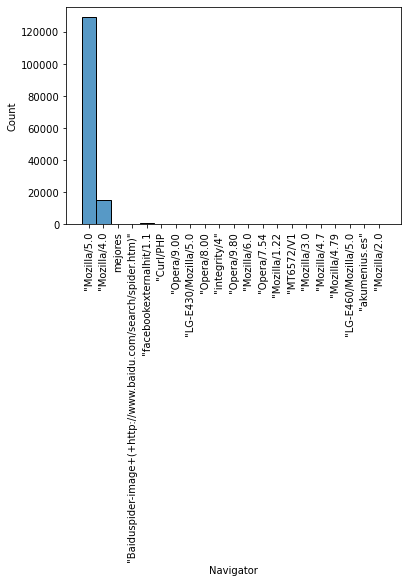

In [280]:
sns.histplot(data=dfc, x=8)
plt.xticks(rotation=90)
plt.xlabel('Navigator')
plt.show()

Seems that there is only an entry off. All the other ones are navigators and even we have two searchbots (baiduspider and facebook).

Since we don't know what it is "mejores" let's investigate:

In [281]:
tmp2 = dfc.index[dfc[8]== 'mejores'].tolist()
dfc.iloc[tmp2,:]

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
6751,[23/Feb/2014:08:27:35,+0100],"""GET",/destinos-baratos/destinos-caracteristicas/hot...,"HTTP/1.1""",200,13231,"""http://www.google.com.hk/url?sa=t&rct=j&q=los",mejores,masajes,...,None,None,None,None,None,None,None,None,None,None


Defintively, the columns up to 3 are all useless for our analysis, let's drop them all:

In [282]:
listcols = list(range(4,46))
dfc.drop(listcols, axis=1, inplace=True)
dfc.drop([1,2], axis=1, inplace=True)

In [283]:
dfc

,0,3
0,[23/Feb/2014:03:10:31,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...
1,[23/Feb/2014:03:10:33,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...
2,[23/Feb/2014:03:10:35,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...
3,[23/Feb/2014:03:10:38,/hoteles-baratos/ofertas-hotel-Kensington-Town...
4,[23/Feb/2014:03:10:39,/destinos-baratos/destinosEstrelles/hoteles-en...
...,...,...
229450,[02/Mar/2014:03:05:33,/robots.txt
229451,[02/Mar/2014:03:05:35,/
229452,[02/Mar/2014:03:05:34,/
229453,[02/Mar/2014:03:05:35,/


In [284]:
dfa = pd.concat([df, dfc], axis=1)
dfa

,IP,Date_Site,0,3
0,66.249.76.216,"[23/Feb/2014:03:10:31 +0100] ""GET /hoteles-bar...",[23/Feb/2014:03:10:31,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...
1,66.249.76.216,"[23/Feb/2014:03:10:33 +0100] ""GET /hoteles-bar...",[23/Feb/2014:03:10:33,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...
2,66.249.76.216,"[23/Feb/2014:03:10:35 +0100] ""GET /hoteles-bar...",[23/Feb/2014:03:10:35,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...
3,66.249.76.216,"[23/Feb/2014:03:10:38 +0100] ""GET /hoteles-bar...",[23/Feb/2014:03:10:38,/hoteles-baratos/ofertas-hotel-Kensington-Town...
4,66.249.76.216,"[23/Feb/2014:03:10:39 +0100] ""GET /destinos-ba...",[23/Feb/2014:03:10:39,/destinos-baratos/destinosEstrelles/hoteles-en...
...,...,...,...,...
229450,5.255.253.53,"[02/Mar/2014:03:05:33 +0100] ""GET /robots.txt ...",[02/Mar/2014:03:05:33,/robots.txt
229451,5.255.253.53,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...",[02/Mar/2014:03:05:35,/
229452,5.255.253.53,"[02/Mar/2014:03:05:34 +0100] ""GET / HTTP/1.1"" ...",[02/Mar/2014:03:05:34,/
229453,5.255.253.53,"[02/Mar/2014:03:05:35 +0100] ""GET / HTTP/1.1"" ...",[02/Mar/2014:03:05:35,/


In [285]:
dfa.rename(columns={0: 'Date', 3: 'Website'}, inplace=True)
dfa.drop('Date_Site', axis=1, inplace=True)
dfa.head()

,IP,Date,Website
0,66.249.76.216,[23/Feb/2014:03:10:31,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...
1,66.249.76.216,[23/Feb/2014:03:10:33,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...
2,66.249.76.216,[23/Feb/2014:03:10:35,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...
3,66.249.76.216,[23/Feb/2014:03:10:38,/hoteles-baratos/ofertas-hotel-Kensington-Town...
4,66.249.76.216,[23/Feb/2014:03:10:39,/destinos-baratos/destinosEstrelles/hoteles-en...


In [286]:
df = dfa.copy()

Now, let's remake the time column. We split the date column in day and hour, but first we clean the [ that we forgot to clean.

In [287]:
# cleaning 
dfc = df['Date'].str.split("[",expand=True)
dfc.drop(0, axis=1, inplace=True)
dfc.head()

,1
0,23/Feb/2014:03:10:31
1,23/Feb/2014:03:10:33
2,23/Feb/2014:03:10:35
3,23/Feb/2014:03:10:38
4,23/Feb/2014:03:10:39


In [288]:
# separating date of time
dfcb = dfc[1].str.split('(\:\d+\:\d+\:\d+$)',expand=True)
dfcb.rename(columns={0:'Day'}, inplace=True)
dfcb.head()

,Day,1,2
0,23/Feb/2014,:03:10:31,
1,23/Feb/2014,:03:10:33,
2,23/Feb/2014,:03:10:35,
3,23/Feb/2014,:03:10:38,
4,23/Feb/2014,:03:10:39,


In [289]:
# before going forward, we put away the double dot in front of the hour.
tmp = dfcb[1].str.split('^\:',expand=True)
tmp.rename(columns={0:'Empty', 1:'Hour'}, inplace=True)
dfcbb = pd.concat([dfcb, tmp], axis=1)
dfcbb.head()

,Day,1,2,Empty,Hour
0,23/Feb/2014,:03:10:31,,,03:10:31
1,23/Feb/2014,:03:10:33,,,03:10:33
2,23/Feb/2014,:03:10:35,,,03:10:35
3,23/Feb/2014,:03:10:38,,,03:10:38
4,23/Feb/2014,:03:10:39,,,03:10:39


In [290]:
dfcbb.drop([1,2,'Empty'], axis=1, inplace=True)


In [291]:
dfcbb['date'] =  dfcbb[['Day', 'Hour']].agg(' '.join, axis=1) 
dfcbb.head()

,Day,Hour,date
0,23/Feb/2014,03:10:31,23/Feb/2014 03:10:31
1,23/Feb/2014,03:10:33,23/Feb/2014 03:10:33
2,23/Feb/2014,03:10:35,23/Feb/2014 03:10:35
3,23/Feb/2014,03:10:38,23/Feb/2014 03:10:38
4,23/Feb/2014,03:10:39,23/Feb/2014 03:10:39


In [292]:
dfcbb['date'] = pd.to_datetime(dfcbb['date'])

In [293]:
dfa = pd.concat([df, dfcbb], axis=1)
dfa.drop(['Day', 'Hour', 'Date'], axis=1, inplace=True)
dfa

,IP,Website,date
0,66.249.76.216,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Le...,2014-02-23 03:10:31
1,66.249.76.216,/hoteles-baratos/ofertas-hotel-Metropolis-Hote...,2014-02-23 03:10:33
2,66.249.76.216,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Bue...,2014-02-23 03:10:35
3,66.249.76.216,/hoteles-baratos/ofertas-hotel-Kensington-Town...,2014-02-23 03:10:38
4,66.249.76.216,/destinos-baratos/destinosEstrelles/hoteles-en...,2014-02-23 03:10:39
...,...,...,...
229450,5.255.253.53,/robots.txt,2014-03-02 03:05:33
229451,5.255.253.53,/,2014-03-02 03:05:35
229452,5.255.253.53,/,2014-03-02 03:05:34
229453,5.255.253.53,/,2014-03-02 03:05:35


In [294]:
df = dfa.copy()

This is the dataset cleaned, now, if we were interested only on the hotel destinations checked we could proceed in cleaning the column Website.

In this case, for cleaning the websites (destinations looked by the user) we need to take into account that inside the column there are the sites related to the url, images, complementary files (like robots.txt), etc. 

As we can see in the snapshot above, that are values like '/' (root) or the the robots.txt file, and even we have images like the icon.png.

And also, we need to be careful when to filtrate the dataset, since there maybe values without the costumary ".html", as:

In [295]:
dfa.Website[4]

'/destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas'

If we take a peak to this column we found that there are 65767 different values and the most repeated ones, overall IPs, are the ones that load the content on the website (like / and button images).

In [296]:
dfa.Website.nunique()

65767

In [297]:
dfa.Website.value_counts()

/                                                                                           2299
/modules/raton/views/themes/bcoos/images/boto_home_reserva.png                              1753
/includes/images/uploaded/logo.png                                                          1739
/modules/raton/views/themes/bcoos/images/boto_home_planea.png                               1737
/modules/raton/views/themes/bcoos/images/boto_home_elige.png                                1730
                                                                                            ... 
/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Basilea_SUIZA-con-Gimnasia       1
/destinosEstrelles/hoteles-en-KalmarSUECIA_-con-1-estrella                                     1
/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Berna_SUIZA-con-Garaje           1
/destinos-baratos/destinos-caracteristicas/hoteles-baratos-en-Blois_FRANCIA-con-Gimnasio       1
/destinos-caracteristicas/hote

But in the end of the day, our analysis wants to take into account all webcontent, since we want to know how much time each IP has been browsing in the Akumenius web.

Since we have decided that we count all the material checked by time, first we will map out the number of links acceded by day and hour, and afterwards we will get the time on the webpage for each IP and day.

Now, let's group by IP, Day, Hour to know the number of webs accessed:

In [298]:
df1 = dfa.groupby(['IP','date']).size().reset_index(name='WebAcc')
df1

,IP,date,WebAcc
0,101.199.108.59,2014-02-26 10:01:56,1
1,101.199.108.59,2014-02-26 10:01:57,8
2,101.199.108.59,2014-02-26 10:01:58,12
3,101.199.108.59,2014-02-26 10:01:59,8
4,101.199.108.59,2014-02-26 10:02:00,3
...,...,...,...
111977,98.244.10.248,2014-02-24 01:00:59,2
111978,98.244.10.248,2014-02-24 01:01:00,7
111979,98.244.10.248,2014-02-24 01:01:28,1
111980,98.244.10.248,2014-02-24 01:01:37,1


We now get the increment of time that each IP had been online, then we sum all the webs/webcontent that each IP has checked.

In [299]:
df12 = df1[['IP', 'date']]

In [300]:
df12 = df12.groupby(['IP']).agg(['min', 'max']).reset_index()
df12['Dtime'] = df12[('date','max')] - df12[('date','min')]
df12.head()

IP                date                               Dtime
                                   min                 max                
0   101.199.108.59 2014-02-26 10:01:56 2014-02-26 10:02:00 0 days 00:00:04
1  101.226.167.226 2014-02-28 16:14:04 2014-02-28 16:14:04 0 days 00:00:00
2    107.178.37.48 2014-03-01 22:17:53 2014-03-01 22:45:34 0 days 00:27:41
3   107.178.38.221 2014-02-27 23:40:04 2014-02-27 23:49:33 0 days 00:09:29
4    107.21.14.116 2014-02-25 17:52:29 2014-02-25 17:53:24 0 days 00:00:55

In [301]:
df12['Dtime'] = df12['Dtime'].dt.seconds
df12.head()

IP                date                     Dtime
                                   min                 max      
0   101.199.108.59 2014-02-26 10:01:56 2014-02-26 10:02:00     4
1  101.226.167.226 2014-02-28 16:14:04 2014-02-28 16:14:04     0
2    107.178.37.48 2014-03-01 22:17:53 2014-03-01 22:45:34  1661
3   107.178.38.221 2014-02-27 23:40:04 2014-02-27 23:49:33   569
4    107.21.14.116 2014-02-25 17:52:29 2014-02-25 17:53:24    55

Here we can see that some IPs had spend less than 1second in the webpage, because our precission in only up to the second, so we add a little incrment of time on the Dtime column, in this case we do $\epsilon =$1 milisecond, to take into account the time differences that are 0seconds. 

In [302]:
df12['Dtime'] = df12['Dtime'] + 0.1

In [303]:
#drop the columns date, min and date, max
df12.drop(['IP',('date','min'), ('date', 'max')], axis=1,inplace=True)
df12 = df12.reset_index(drop=True)

In [304]:
df13 = df1[['IP', 'WebAcc']]
df13 = df13.groupby('IP').sum().reset_index()
df13.head()

,IP,WebAcc
0,101.199.108.59,32
1,101.226.167.226,1
2,107.178.37.48,185
3,107.178.38.221,172
4,107.21.14.116,2


Now we have them the same shape, thus we can concatenate them.

In [305]:
df1 = pd.concat([df13, df12], axis=1)
df1.head()

,IP,WebAcc,"(Dtime, )"
0,101.199.108.59,32,4.1
1,101.226.167.226,1,0.1
2,107.178.37.48,185,1661.1
3,107.178.38.221,172,569.1
4,107.21.14.116,2,55.1


In [306]:
for col in df1.columns:
    print(col)

IP
WebAcc
('Dtime', '')


> After doing max/min and getting the difference between these times, the column Dtime has kept the format of two indexes, I have not found the way of returning it the sole field, but it has not been unfavorable for our analysis.

In [307]:
dfa = df1.copy()

Now we have the dataset as we want to in order to make the analysis.

Let's check that all values are consistent, and there are no nuls, and the final dimensions of our dataset:

In [308]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IP         2874 non-null   object 
 1   WebAcc     2874 non-null   int64  
 2   (Dtime, )  2874 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 67.5+ KB


In [309]:
dfa.shape

(2874, 3)

In [310]:
dfa.nunique()

IP           2874
WebAcc        290
(Dtime, )    1328
dtype: int64

In [311]:
df = dfa.copy()

## Exercici 3: Geolocalitza les IP's.

We can find in google many websites that are able to geolocalize our ip. In this problem we will using [3], because is the only one that when entering the data in chuncks allows more than 2000 avaluations, without account. Even though, [1] and [2] are better since they get the city more correctly than [3], but in this analysis we only take into account the country, which [3] does relativelly well (there are some NaN and None values).

[1] https://ipinfo.io/

[2] http://ip-api.com

[3] https://geolocation-db.com/jsonp/'

[4] Using ip2geotools.

In [398]:
# split the data set in shorter ones
df1a = df.loc[:600, :]
df1b = df.loc[601:1200, :]
df1c = df.loc[1201:1700, :]
df1d = df.loc[1701:, :]

,IP,WebAcc,"(Dtime, )"
0,101.199.108.59,32,4.1
1,101.226.167.226,1,0.1
2,107.178.37.48,185,1661.1
3,107.178.38.221,172,569.1
4,107.21.14.116,2,55.1
...,...,...,...
596,180.76.6.61,31,56410.1
597,180.76.6.62,41,3910.1
598,180.76.6.63,31,7983.1
599,180.76.6.64,30,52309.1


In [356]:
# function for webpage [1]
def ip_geolocal1(ip):
    # address to get the json:
    url = 'https://ipinfo.io/' + ip + '/json' #web [1]
    # connect to the webpage and convert it to a format readable for python
    data = json.load(urlopen(url))
    
    country = data['country']
    return country

In [357]:
# function for webpage [2]
def ip_geolocal2(ip):
    # address to get the json:
    url = 'http://ip-api.com/json/' + ip # web [2]
    # connect to the webpage and convert it to a format readable for python
    data = json.load(urlopen(url))
    
    country = data['country']
    return country

In [391]:
def ip_geolocal3(ip):
    with urlopen('https://geolocation-db.com/jsonp/'+ip) as url: # web [3]
        # connect to the webpage and convert it to a format readable for python
        data = url.read().decode()
        data = data.split('(')[1].strip(')')
        return json.loads(data)['country_name']


In [313]:
def ip_geol(ip):
    data = DbIpCity.get(ip, api_key='free')
    return data.country

In [401]:
countries = []
ips = []

for index, row in df1a.iterrows():
    data = row['IP']
    if data not in ips:
        print(data)
        ips.append(data)
        response = ip_geolocal3(row['IP'])
        if response != None:
            #print(response)
            countries.append(response)
        else:
            #print(response)
            countries.append(np.nan)
# Make a new df
ips = {'ip': ips,'country': countries}

df2a = pd.DataFrame(ips, columns = ['ip', 'country'])    
print(df2a)

101.199.108.59
China
101.226.167.226
China
107.178.37.48
United States
107.178.38.221
United States
107.21.14.116
United States
108.168.250.12
United States
108.59.8.80
United States
109.107.105.181
Spain
109.111.118.37
Andorra
109.111.120.188
Andorra
109.120.157.179
Russia
109.200.159.118
Ukraine
109.205.137.141
Spain
109.208.120.233
France
109.211.53.111
France
109.217.107.218
France
109.235.22.27
Spain
109.27.131.25
France
109.8.122.25
France
112.200.39.14
Philippines
112.90.194.41
China
114.24.157.104
Taiwan
114.26.127.57
Taiwan
114.37.83.53
Taiwan
116.8.99.217
China
117.144.215.242
China
117.41.186.10
China
119.63.193.130
Japan
119.63.193.131
Japan
119.63.193.132
Japan
119.63.193.194
Japan
119.63.193.195
Japan
119.63.193.196
Japan
119.63.196.28
Japan
119.63.196.92
Japan
119.63.196.94
Japan
119.96.185.53
China
119.98.239.252
China
12.14.13.130
United States
12.145.193.9
United States
121.14.139.202
China
121.14.228.8
China
123.125.71.105
China
123.125.71.12
China
123.125.71.13
Chin

United States
173.252.103.2
United States
173.252.103.3
United States
173.252.103.4
United States
173.252.103.5
United States
173.252.103.6
United States
173.252.103.7
United States
173.252.110.112
United States
173.252.110.113
United States
173.252.110.114
United States
173.252.110.115
United States
173.252.110.116
United States
173.252.110.117
United States
173.252.110.118
United States
173.252.110.119
United States
173.252.112.112
United States
173.252.112.113
United States
173.252.112.114
United States
173.252.112.115
United States
173.252.112.116
United States
173.252.112.117
United States
173.252.112.118
United States
173.252.112.119
United States
173.252.113.113
United States
173.252.113.117
United States
173.252.120.112
United States
173.252.120.113
United States
173.252.120.114
United States
173.252.120.115
United States
173.252.120.116
United States
173.252.120.117
United States
173.252.120.118
United States
173.252.120.119
United States
173.252.73.112
United States
173.252.7

In [404]:
#dataset df1b:
countries = []
ips = []

for index, row in df1b.iterrows():
    data = row['IP']
    if data not in ips:
        print(data)
        ips.append(data)
        response = ip_geolocal3(row['IP'])
        if response != None:
            print(response)
            countries.append(response)
        else:
            print(response)
            countries.append(np.nan)
            
ips = {'ip': ips,'country': countries}

df2b = pd.DataFrame(ips, columns = ['ip', 'country'])    
print(df2b)


180.76.6.66
China
181.113.146.88
Ecuador
181.114.123.160
Bolivia
181.118.30.53
Argentina
181.151.21.227
Colombia
181.164.57.183
Argentina
181.166.120.98
Argentina
181.196.179.2
Ecuador
181.235.206.45
Colombia
181.51.237.57
Colombia
181.67.176.253
Peru
181.95.10.32
Argentina
182.118.22.224
China
182.118.25.221
China
182.118.25.222
China
182.118.25.227
China
182.118.25.229
China
183.13.150.55
China
183.60.212.156
China
183.60.213.109
China
183.60.213.61
China
183.60.214.6
China
183.60.215.54
China
183.91.14.219
Vietnam
184.173.238.166
United States
184.173.238.167
United States
184.73.59.145
United States
185.10.104.130
nan
185.10.104.131
nan
185.10.104.132
nan
185.10.104.194
nan
185.10.104.195
nan
185.10.104.196
nan
185.16.209.176
Spain
185.25.27.178
Spain
185.27.136.38
Spain
185.3.117.155
Spain
185.30.177.23
Netherlands
185.44.31.152
Spain
186.1.1.62
Nicaragua
186.1.15.210
Nicaragua
186.10.21.10
Chile
186.10.26.3
Chile
186.108.178.203
Argentina
186.115.68.62
Colombia
186.148.91.66
Domi

United States
199.30.25.209
United States
199.30.25.21
United States
199.30.25.230
United States
199.30.25.29
United States
199.30.25.45
United States
199.30.25.61
United States
199.30.25.75
United States
199.30.25.94
United States
199.30.26.221
United States
199.58.86.206
United States
199.59.148.211
United States
199.80.54.22
United States
2.136.17.138
Spain
2.136.222.9
Spain
2.136.37.89
Spain
2.136.76.13
Spain
2.137.103.28
Spain
2.137.16.40
Spain
2.137.213.20
Spain
2.137.47.70
Spain
2.138.119.2
Spain
2.138.206.93
Spain
2.139.145.206
Spain
2.139.171.253
Spain
2.139.201.28
Spain
2.139.201.29
Spain
2.139.225.57
Spain
2.139.229.47
Spain
2.139.23.118
Spain
2.139.249.224
Spain
2.140.27.253
Spain
2.142.98.251
Spain
2.197.29.235
Italy
2.40.14.75
Italy
2.9.116.235
France
2.9.118.92
France
2.9.203.175
France
200.0.29.9
Ecuador
200.106.114.232
Peru
200.116.194.112
Colombia
200.12.141.223
Chile
200.153.240.37
Brazil
200.205.88.106
Brazil
200.23.91.150
Mexico
200.24.215.217
Ecuador
200.46.114.19

In [405]:
#dataset df1c:
countries = []
ips = []

for index, row in df1c.iterrows():
    data = row['IP']
    if data not in ips:
        print(data)
        ips.append(data)
        response = ip_geolocal3(row['IP'])
        if response != None:
            #print(response)
            countries.append(response)
        else:
            #print(response)
            countries.append(np.nan)

ips = {'ip': ips,'country': countries}

df2c = pd.DataFrame(ips, columns = ['ip', 'country'])    
print(df2c)

213.98.133.235
Spain
213.98.186.128
Spain
213.98.217.80
Spain
216.107.155.114
United States
216.12.205.122
Singapore
216.151.130.170
United States
216.151.137.36
United States
216.152.251.72
United States
216.185.35.54
United States
216.82.251.232
United States
216.9.35.59
United States
217.111.219.237
Spain
217.116.27.81
Spain
217.12.16.130
Spain
217.12.16.56
Spain
217.12.20.253
Spain
217.12.28.130
Spain
217.12.28.5
Spain
217.124.183.226
Spain
217.125.108.49
Spain
217.125.120.209
Spain
217.125.17.133
Spain
217.125.21.135
Spain
217.125.71.222
Spain
217.127.176.170
Spain
217.127.87.222
Spain
217.130.150.116
Spain
217.130.246.205
Spain
217.14.47.20
Spain
217.156.188.174
Spain
217.16.255.159
Spain
217.200.185.232
Italy
217.216.120.71
Spain
217.216.36.142
Spain
217.217.201.238
Spain
217.217.8.44
Spain
217.217.99.195
Spain
217.251.132.175
Germany
217.251.135.62
Germany
217.29.96.144
Spain
217.71.18.36
Spain
218.25.174.66
China
218.30.103.53
China
218.30.103.65
China
220.135.213.4
Taiwan
220

Spain
62.175.139.150
Spain
62.42.1.201
Spain
62.42.118.227
Spain
62.43.141.251
Spain
62.43.190.52
Spain
62.47.205.165
Austria
62.57.103.170
Spain
62.57.176.78
Spain
62.57.72.99
Spain
62.81.164.42
Spain
62.82.118.54
Spain
62.82.224.122
Spain
62.82.70.58
Spain
62.82.76.90
Spain
62.83.159.84
Spain
62.83.195.177
Spain
62.83.204.89
Spain
62.83.34.31
Spain
62.83.85.60
Spain
62.87.24.215
Spain
62.87.30.66
Spain
62.99.80.253
Spain
63.147.126.185
United States
64.246.178.34
United States
64.246.187.42
United States
64.71.196.139
United States
64.71.198.139
United States
64.71.199.139
United States
64.71.199.80
United States
64.71.201.91
United States
64.71.204.200
United States
65.52.104.230
United States
65.52.244.220
United States
65.55.213.245
United States
65.55.213.246
United States
65.55.213.66
United States
65.55.213.69
United States
65.55.215.104
United States
65.55.215.35
United States
65.55.215.38
United States
65.55.215.42
United States
65.55.215.43
United States
65.55.215.46
United 

In [406]:
#dataset df1d:
countries = []
ips = []

for index, row in df1d.iterrows():
    data = row['IP']
    if data not in ips:
        #print(data)
        ips.append(data)
        response = ip_geolocal3(row['IP'])
        if response != None:
            #print(response)
            countries.append(response)
        else:
            #print(response)
            countries.append(np.nan)
        
ips = {'ip': ips,'country': countries}

df2d = pd.DataFrame(ips, columns = ['ip', 'country'])    
print(df2d)

66.249.65.236
United States
66.249.65.3
United States
66.249.66.178
United States
66.249.66.188
United States
66.249.66.198
United States
66.249.66.208
United States
66.249.73.208
United States
66.249.73.8
United States
66.249.74.148
United States
66.249.74.160
United States
66.249.74.172
United States
66.249.75.148
United States
66.249.75.178
United States
66.249.75.188
United States
66.249.75.198
United States
66.249.75.208
United States
66.249.75.221
United States
66.249.75.28
United States
66.249.75.36
United States
66.249.76.178
United States
66.249.76.191
United States
66.249.76.209
United States
66.249.76.210
United States
66.249.76.213
United States
66.249.76.215
United States
66.249.76.216
United States
66.249.76.217
United States
66.249.76.219
United States
66.249.76.220
United States
66.249.76.224
United States
66.249.76.225
United States
66.249.76.226
United States
66.249.76.229
United States
66.249.76.231
United States
66.249.76.233
United States
66.249.76.234
United State

Spain
80.36.238.19
Spain
80.36.67.191
Spain
80.37.230.56
Spain
80.38.244.251
Spain
80.39.169.253
Spain
80.39.196.55
Spain
80.39.210.69
Spain
80.39.240.226
Spain
80.58.250.78
Spain
80.58.250.92
Spain
80.58.250.94
Spain
80.59.2.216
Spain
80.59.58.36
Spain
80.73.153.149
Spain
80.81.127.85
Spain
81.172.12.71
Spain
81.184.173.195
Spain
81.184.173.44
Spain
81.184.19.126
Spain
81.184.202.43
Spain
81.184.251.178
Spain
81.184.26.137
Spain
81.184.89.236
Spain
81.202.103.206
Spain
81.202.148.197
Spain
81.202.246.161
Spain
81.203.188.244
Spain
81.203.193.174
Spain
81.203.204.179
Spain
81.203.227.2
Spain
81.203.229.114
Spain
81.203.237.169
Spain
81.203.65.27
Spain
81.32.32.232
Spain
81.32.9.109
Spain
81.32.90.100
Spain
81.33.166.44
Spain
81.33.210.204
Spain
81.33.63.30
Spain
81.33.91.248
Spain
81.33.99.91
Spain
81.34.148.106
Spain
81.34.171.58
Spain
81.34.198.86
Spain
81.34.246.7
Spain
81.34.34.145
Spain
81.34.78.156
Spain
81.35.112.206
Spain
81.35.113.21
Spain
81.35.144.114
Spain
81.35.171.130
Spa

Spain
85.59.181.208
Spain
85.60.14.66
Spain
85.60.169.219
Spain
85.60.237.93
Spain
85.62.233.161
Spain
85.62.233.162
Spain
85.62.234.161
Spain
85.62.234.162
Spain
85.84.158.34
Spain
85.84.176.196
Spain
85.84.21.18
Spain
85.84.211.1
Spain
85.84.23.225
Spain
85.84.85.128
Spain
85.85.118.208
Spain
85.85.179.185
Spain
85.85.18.241
Spain
85.85.198.240
Spain
85.85.26.103
Spain
85.85.49.10
Spain
85.86.161.201
Spain
85.86.195.82
Spain
85.87.134.107
Spain
85.87.32.234
Spain
86.123.247.161
Romania
86.217.164.29
France
86.217.4.14
France
86.218.28.181
France
86.221.241.137
France
86.62.136.73
Norway
86.97.82.18
United Arab Emirates
87.100.101.121
France
87.100.107.176
France
87.111.221.104
Spain
87.111.241.81
Spain
87.111.8.93
Spain
87.112.203.128
United Kingdom
87.2.163.210
Italy
87.217.147.158
Spain
87.217.157.137
Spain
87.217.194.154
Spain
87.217.56.160
Spain
87.217.73.154
Spain
87.217.74.153
Spain
87.218.127.253
Spain
87.218.139.190
Spain
87.218.156.183
Spain
87.218.196.208
Spain
87.219.136.8

In [407]:
# merge the three of them with concat:
df2 = pd.concat([df2a, df2b, df2c, df2d])

In [414]:
df2.shape

(2874, 2)

In [422]:
df2 = df2.reset_index(drop=True)

In [423]:
df2.to_csv('ip_country.csv')

In [449]:
df = pd.concat([dfa, df2], axis=1)

In [451]:
df.drop('ip',axis=1,inplace=True)

In [452]:
df.head()

,IP,WebAcc,"(Dtime, )",country
0,101.199.108.59,32,4.1,China
1,101.226.167.226,1,0.1,China
2,107.178.37.48,185,1661.1,United States
3,107.178.38.221,172,569.1,United States
4,107.21.14.116,2,55.1,United States


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IP         2874 non-null   object 
 1   WebAcc     2874 non-null   int64  
 2   (Dtime, )  2874 non-null   float64
 3   country    2861 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 89.9+ KB


We can see there are some values null in country let's check them:

In [477]:
# check if there are any null values:
df.isnull().sum()

IP            0
WebAcc        0
(Dtime, )     0
country      13
dtype: int64

In [ ]:
# Let's check these 13 null values
ind = df[df.country.isnull()].index.tolist()

In [486]:
# since they are 13 only we can try to use any of the other functions that allow less ips to read.
for i in range(len(ind)):    
    ip = df.loc[ind[i],'IP']
    c1 = ip_geolocal2(ip)
    print(c1)

    df.loc[ind[i], 'country'] = c1

Germany
Germany
Germany
Germany
Germany
Germany
Denmark
United States
Germany
United States
Taiwan
United States
United States


In [487]:
df.iloc[ind,:]

,IP,WebAcc,"(Dtime, )",country
628,185.10.104.130,10,1539.1,Germany
629,185.10.104.131,11,11822.1,Germany
630,185.10.104.132,8,24611.1,Germany
631,185.10.104.194,6,7348.1,Germany
632,185.10.104.195,6,46301.1,Germany
633,185.10.104.196,8,77758.1,Germany
805,193.162.26.10,20,2.1,Denmark
881,198.36.87.81,5,58562.1,United States
1093,204.104.55.244,3,82824.1,Germany
1749,66.249.81.141,89,36786.1,United States


In [530]:
# Let's do the same for the not founds:
ind = df[df.country == 'Not found'].index.tolist()
df.iloc[ind,:]

,IP,WebAcc,"(Dtime, )",country
801,193.150.120.33,36,73749.1,Not found


In [533]:
ip = df.loc[ind[0],'IP']
c2 = ip_geolocal2(ip)
print(c2)

df.loc[ind[0], 'country'] = c1

United Kingdom


In [534]:
df.loc[ind,:]

,IP,WebAcc,"(Dtime, )",country
801,193.150.120.33,36,73749.1,United States


In [535]:
dfx = df.copy()

# Nivell 3

## Exercici 4: Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

From here we can proceed to do some analysis on the data. Since, the exercise asks for standarization we need extract some numerical variables.

We will analyse how much time each IP (user) spends in total and how many pages during this time are "downloaded" on his device.

Afterwards, we will compare which country it is the one that has spend more time in "akumenius.com"

The table shows the IPs, the number of content "webpages" that had each user seen and how much time they have spend on the website.

In [539]:
# user that had spend more time:
tmp = df[('Dtime','')].idxmax()
df.iloc[tmp,:]

IP           192.95.12.31
WebAcc                  2
(Dtime, )         86384.1
country            Canada
Name: 789, dtype: object

In [538]:
# user with that has seen more content:
tmp = df['WebAcc'].idxmax()
df.iloc[tmp,:]

IP           66.249.76.216
WebAcc               46382
(Dtime, )          86080.1
country      United States
Name: 1726, dtype: object

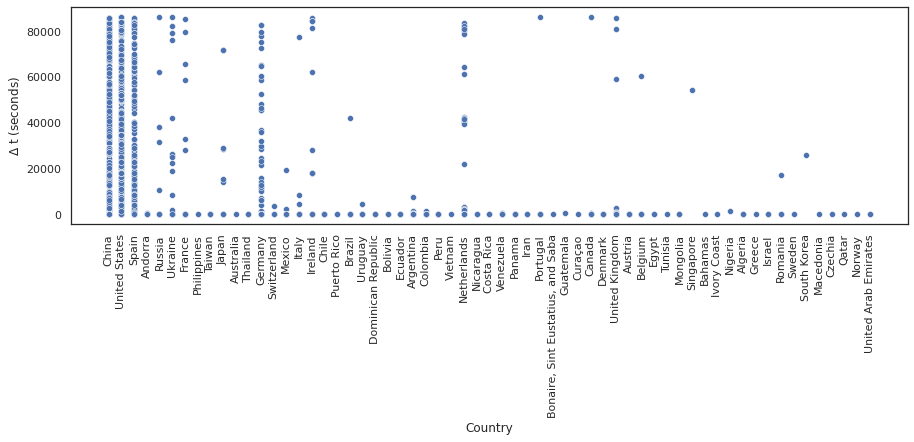

In [566]:
sns.set(style='white', rc={'figure.figsize':(15,4)})
sns.scatterplot(data=df, x='country', y =('Dtime',''))
plt.ylabel(r'$\Delta$ t (seconds)')
plt.xlabel(r'Country')
plt.xticks(rotation=90)
plt.show()

Graph [1]. We can see, in this graph, that China, US, Spain Ukraine, France, Japan, Italy, Ireland, Netherlands, Portugal, Canada, UK, Signapore. So, most of the people that had spend time in this website are from countries of South-East Europe, North America and East Asia.

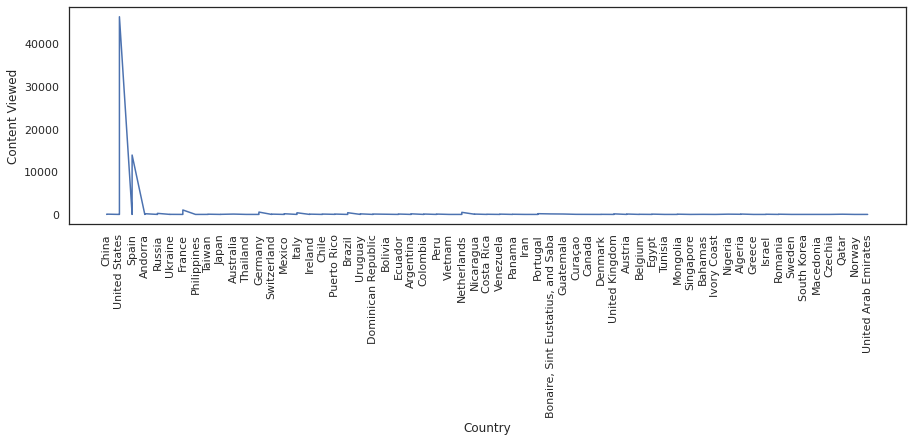

In [544]:
sns.set(style='white', rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='country', y ='WebAcc', estimator=None)
plt.ylabel(r'Content Viewed')
plt.xlabel(r'Country')
plt.xticks(rotation=90)
plt.show()

Graph [2]. The graph shows a clear peak on more content on the US, followed by Spain users. It indicates that the US users are the ones who have checked for more hotel rooms in this website.

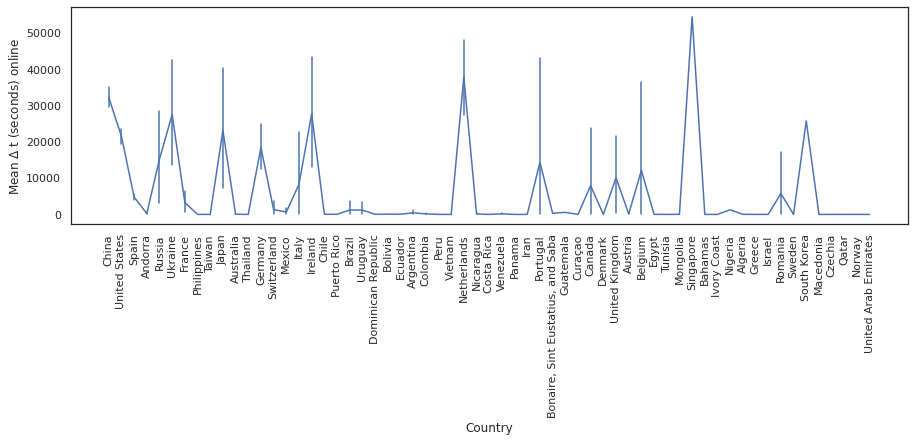

In [567]:
sns.set(style='white', rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='country', y =('Dtime',''), estimator='mean', err_style='bars')
plt.ylabel(r'Mean $\Delta$ t (seconds) online')
plt.xlabel(r'Country')
plt.xticks(rotation=90)
plt.show()

Graph[3]. Much like the graph [1], graph[3] shows that most times online are from countries of South-East Europe, North America, and East Asia.

The Mean time spent in this webpage shows a strange artifact on Signapore, this might be caused because we have only a user that had conected and had spent a larger time than the others, thus the mean of the country is the mean time spent for this user. We can see that is so, because this one, as the one in South Korea, don't show any error bar, thus the stimation has been done over 1 user.

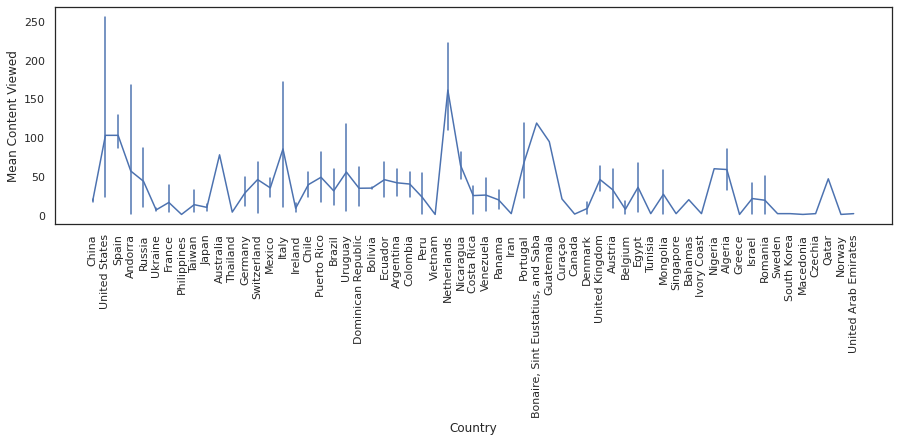

In [549]:
sns.set(style='white', rc={'figure.figsize':(15,4)})
sns.lineplot(data=df, x='country', y ='WebAcc', estimator='mean', err_style='bars')
plt.ylabel(r'Mean Content Viewed')
plt.xlabel(r'Country')
plt.xticks(rotation=90)
plt.show()

Graph [4]. The peak on US and Spain that were shown in graph [2], we can see that must have been produced by few users, since when calculating the mean content view most of the countries are around the 50 webpages. Thus, overall this graphs complements graphs [1] and [3], the countries that spend more time browsing this web are also the ones who see more content.